In [43]:
import os
import tempfile
import collections
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter

In [44]:
def noise_reduction(image_path, filter_type='median', kernel_size=3):
    """
    Applies a noise reduction filter to an image.

    Args:
        image_path: Path to the input image file.
        filter_type: Type of filter to apply ('median', 'gaussian', 'bilateral'). Default is 'median'.
        kernel_size: Size of the kernel for the filter (must be odd). Default is 3.

    Returns:
        A PIL Image object with the noise reduced, or None if an error occurs.
    """
    try:
        img = Image.open(image_path)
        if filter_type == 'median':
            filtered_img = img.filter(ImageFilter.MedianFilter(size=kernel_size))
        elif filter_type == 'gaussian':
            filtered_img = img.filter(ImageFilter.GaussianBlur(radius=kernel_size / 2))
        elif filter_type == 'bilateral':
          filtered_img = img.filter(ImageFilter.BLUR)  # Note: Pillow's BilateralFilter is limited
        else:
            print(f"Error: Invalid filter type '{filter_type}'. Using median filter instead.")
            filtered_img = img.filter(ImageFilter.MedianFilter(size=kernel_size))
        return filtered_img
    except FileNotFoundError:
        print(f"Error: Image file not found at '{image_path}'")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


def display_images(original_img, filtered_img):
  """Displays the original and filtered images side-by-side."""
  fig = plt.figure(figsize=(10, 5))
  gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

  ax1 = plt.subplot(gs[0])
  ax1.imshow(original_img)
  ax1.set_title('Original Image')
  ax1.axis('off')

  ax2 = plt.subplot(gs[1])
  ax2.imshow(filtered_img)
  ax2.set_title('Filtered Image')
  ax2.axis('off')

  plt.tight_layout()
  plt.show()

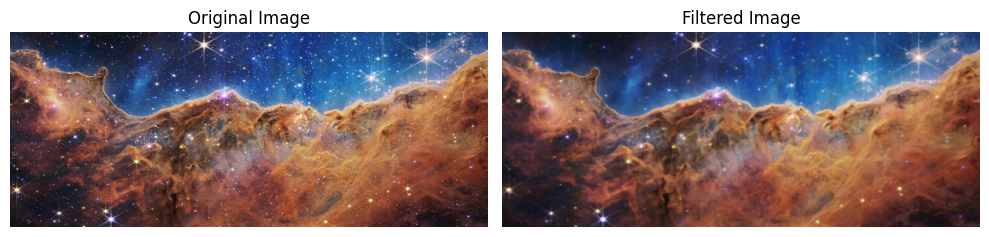

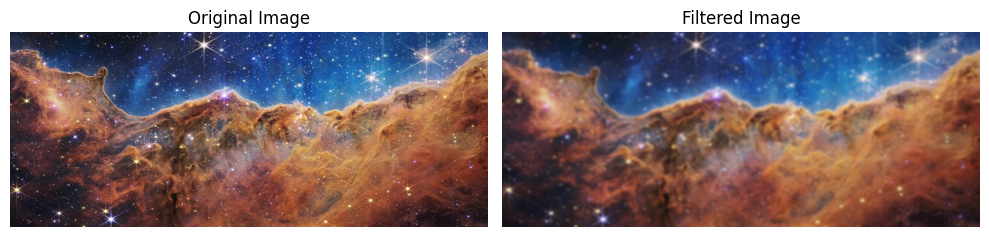

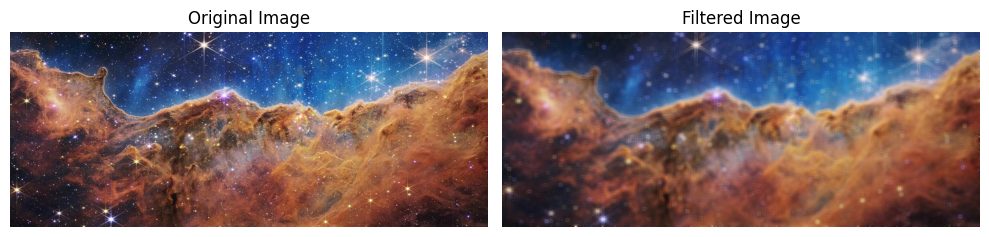

In [45]:
# Example usage
!wget -q https://cdn.esawebb.org/archives/images/newsfeature/weic2205a.jpg -O 'noisy_image.jpg'
image_path = '/content/noisy_image.jpg'

# Apply noise reduction with different filters
filtered_image_median = noise_reduction(image_path, filter_type='median')
filtered_image_gaussian = noise_reduction(image_path, filter_type='gaussian')
filtered_image_bilateral = noise_reduction(image_path, filter_type='bilateral')


original_image = Image.open(image_path)
display_images(original_image, filtered_image_median)
display_images(original_image, filtered_image_gaussian)
display_images(original_image, filtered_image_bilateral)

In [ ]:
# Example usage
!wget -q https://boofcv.org/images/thumb/6/66/Kodim17_noisy.jpg/300px-Kodim17_noisy.jpg -O 'noisy_image.jpg'
image_path = '/content/noisy_image.jpg'

# Apply noise reduction with different filters
filtered_image_median = noise_reduction(image_path, filter_type='median')
filtered_image_gaussian = noise_reduction(image_path, filter_type='gaussian')
filtered_image_bilateral = noise_reduction(image_path, filter_type='bilateral')


original_image = Image.open(image_path)
display_images(original_image, filtered_image_median)
display_images(original_image, filtered_image_gaussian)
display_images(original_image, filtered_image_bilateral)